В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.  
### Задача
1. Загрузите [данные](https://disk.yandex.ru/d/Kl4mPINblwnJCA), проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (`Impressions`) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c `CTR`. Посмотрите на описательные статистики и распределение.
4. Проанализируйте `CTR` с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (`CPC`). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте `CPC` с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

### Описание данных
- `ad_id` – идентификатор объявления (рекламы)  
- `xyz_campaign_id` – идентификатор рекламной кампании в базе компании X  
- `fb_campaign_id` – идентификатор кампании в Facebook  
- `age` – возрастная группа, которой показывалась реклама  
- `gender` – пол тех, кому показывалась реклама  
- `interest` – код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)  
- `impressions` – число показов  
- `clicks` – число кликов  
- `spent` – сумма, которую компания потратила на показ объявления   
- `total_conversion` – количество людей, которые заинтересовались продуктом после просмотра рекламы  
- `approved_conversion` – количество людей, которые купили продукт после просмотра рекламы  

1.Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено?

In [138]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
plt.figure(figsize=(16,16))
sns.set(style="whitegrid", font_scale=1.5)

<Figure size 1152x1152 with 0 Axes>

In [2]:
df=pd.read_csv('C:/Users/serge/Downloads/conversion.csv')

In [3]:
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710001                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [4]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
df.query('Approved_Conversion>Total_Conversion').shape[0]

0

In [7]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [10]:
df.xyz_campaign_id.nunique()

3

3)Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) 
для каждой рекламной кампании в Facebook,
прологарифмировав значения fb_campaign_id – идентификатор кампании в Facebook np.log()

In [35]:
total=(df.groupby('fb_campaign_id').agg({'Impressions':'sum'}))

<AxesSubplot:>

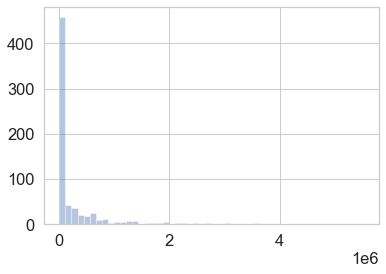

In [39]:
sns.distplot((total),bins=50,kde=False)

<AxesSubplot:>

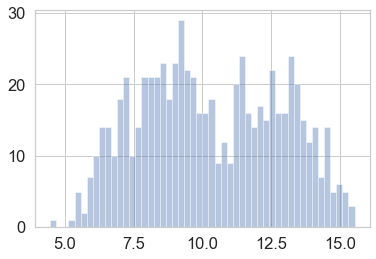

In [40]:
sns.distplot(np.log(total),bins=50,kde=False)

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [96]:
df['CTR']=df.Clicks/df.Impressions*100

In [97]:
df=df.sort_values(by='CTR',ascending=False)

In [108]:
df=df.drop(columns='ctr')

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).
Какому графику соответствует распределение CTR кампании 916

In [102]:
ctr_916=df.query('xyz_campaign_id==916')

C:\Users\serge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR'>

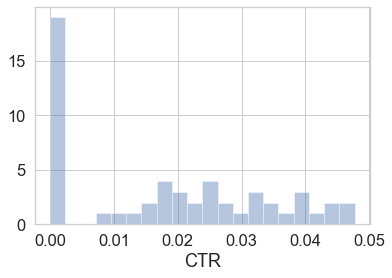

In [103]:
sns.distplot(ctr_916.CTR,bins=20,kde=False)

<AxesSubplot:xlabel='CTR', ylabel='Count'>

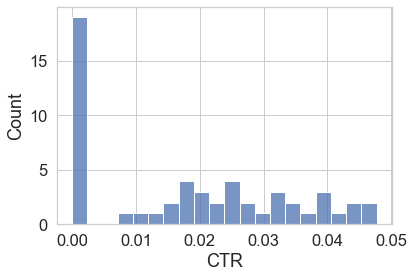

In [104]:
sns.histplot(data=ctr_916,x='CTR',bins=20)

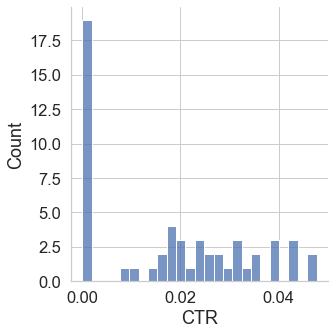

In [105]:
sns.displot(data=ctr_916,x='CTR',bins=25)

6. CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов: Выведите описательные статистики для новой переменной, посмотрите на форму распределения.
В ответе укажите межквартильный размах, округленный до двух знаков после точки. Обратите внимание, что в столбце могут встретиться NaN.
Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика – метод .dropna()

In [68]:
df['CPC']=df.Spent/df.Clicks

In [71]:
df_cpc=df.dropna()

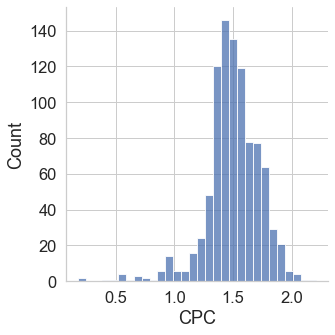

In [76]:
sns.displot(data=df_cpc,x='CPC',bins=30)

In [77]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

размах=75%-25%=1.64-1.39=0.25

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?
Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. Обратите внимание, что удалять NaN из самого датасета не нужно, только для визуализации. Картинка в полном размере – здесь.

In [82]:
girl=df.query('gender=="F"')



In [83]:
men=df.query('gender=="M"')



C:\Users\serge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC'>

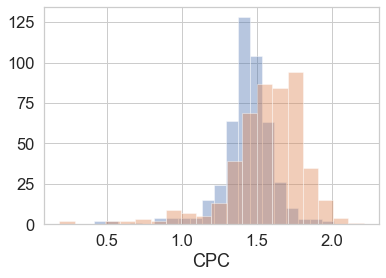

In [92]:
sns.distplot(girl.CPC.dropna(),kde=False,bins=20)
sns.distplot(men.CPC.dropna(),kde=False,bins=20)

In [89]:
men.CPC.describe()

count    473.000000
mean       1.568208
std        0.256175
min        0.180000
25%        1.453784
50%        1.599000
75%        1.734625
max        2.212000
Name: CPC, dtype: float64

In [90]:
girl.CPC.describe()

count    463.000000
mean       1.428999
std        0.181373
min        0.410000
25%        1.367907
50%        1.440000
75%        1.522588
max        2.013333
Name: CPC, dtype: float64

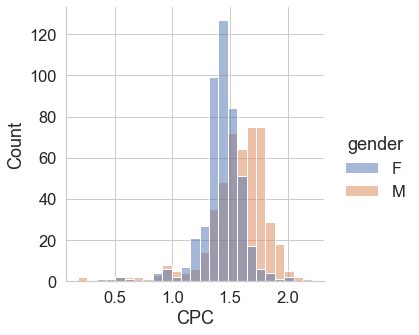

In [94]:
sns.displot(data=df,x='CPC',hue='gender',bins=25)

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.
Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Note: клики – Clicks, покупки – Approved_Conversion.

In [109]:

df.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
150  738637              936          109857  45-49      F        24   
440  950224              936          123464  40-44      M        20   
505  951779              936          123723  45-49      F        27   
476  951202              936          123627  45-49      F        26   
448  950537              936          123516  40-44      M        36   

     Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion   CPC  \
150          944       1   1.42                 1                    0  1.42   
440         2367       2   2.84                 1                    1  1.42   
505         3277       2   2.68                 1                    0  1.34   
476         5307       3   4.29                 2                    1  1.43   
448         1884       1   1.41                 1                    0  1.41   

          CTR  
150  0.105932  
440  0.084495  
505  0.061031  
476  0.056529  
448  0.053079

In [111]:
df['CR'] = df['Approved_Conversion']/ df['Clicks']

In [112]:
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
150   738637              936          109857  45-49      F        24   
440   950224              936          123464  40-44      M        20   
505   951779              936          123723  45-49      F        27   
476   951202              936          123627  45-49      F        26   
448   950537              936          123516  40-44      M        36   
..       ...              ...             ...    ...    ...       ...   
107   735242              936          108826  45-49      F        19   
102   735151              936          108811  40-44      F        28   
719  1121477             1178          144603  40-44      M        21   
13    709040              916          103965  30-34      M        16   
181   747879              936          110947  30-34      F        30   

     Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion   CPC  \
150          944       1   1.42                 1                    0  1.42   
440         2367       2   2.84                 1                    1  1.42   
505         3277       2   2.68                 1                    0  1.34   
476         5307       3   4.29                 2                    1  1.43   
448         1884       1   1.41                 1                    0  1.41   
..           ...     ...    ...               ...                  ...   ...   
107          530       0   0.00                 1                    0   NaN   
102          926       0   0.00                 1                    0   NaN   
719         7073       0   0.00                 1                    0   NaN   
13          5120       0   0.00                 1                    0   NaN   
181          493       0   0.00                 1                    0   NaN   

          CTR        CR  
150  0.105932  0.000000  
440  0.084495  0.500000  
505  0.061031  0.000000  
476  0.056529  0.333333  
448  0.053079  0.000000  
..        ...       ...  
107  0.000000       NaN  
102  0.000000       NaN  
719  0.000000       NaN  
13   0.000000       NaN  
181  0.000000       NaN  

[1143 rows x 14 columns]

In [129]:
a=df.groupby('xyz_campaign_id',as_index=False).agg({'Clicks':'sum','Approved_Conversion':'sum'})

In [130]:
a

xyz_campaign_id  Clicks  Approved_Conversion
0              916     113                   24
1              936    1984                  183
2             1178   36068                  872

In [133]:
a['CR']=a.Approved_Conversion/a.Clicks*100

In [134]:
a

xyz_campaign_id  Clicks  Approved_Conversion         CR
0              916     113                   24  21.238938
1              936    1984                  183   9.223790
2             1178   36068                  872   2.417656

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='CR'>

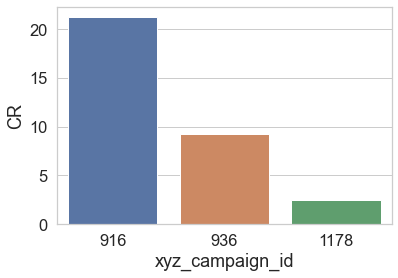

In [137]:
sns.barplot(data=a,x='xyz_campaign_id',y='CR')